In [ ]:
#PART 1 - LINEAR REGRESSION AND THE LIMITS OF LINEAR REGRESSION

In [3]:
#1
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv('part_conditions.csv')

In [5]:
#2
df['cycle_number'].describe()
#The fewest number of cycles it took an engine to fail was 1, the greatest number of cycles it took an engine to fail
#was 362, and the average number of cycles was 108.807862 cycles. 

count    20631.000000
mean       108.807862
std         68.880990
min          1.000000
25%         52.000000
50%        104.000000
75%        156.000000
max        362.000000
Name: cycle_number, dtype: float64

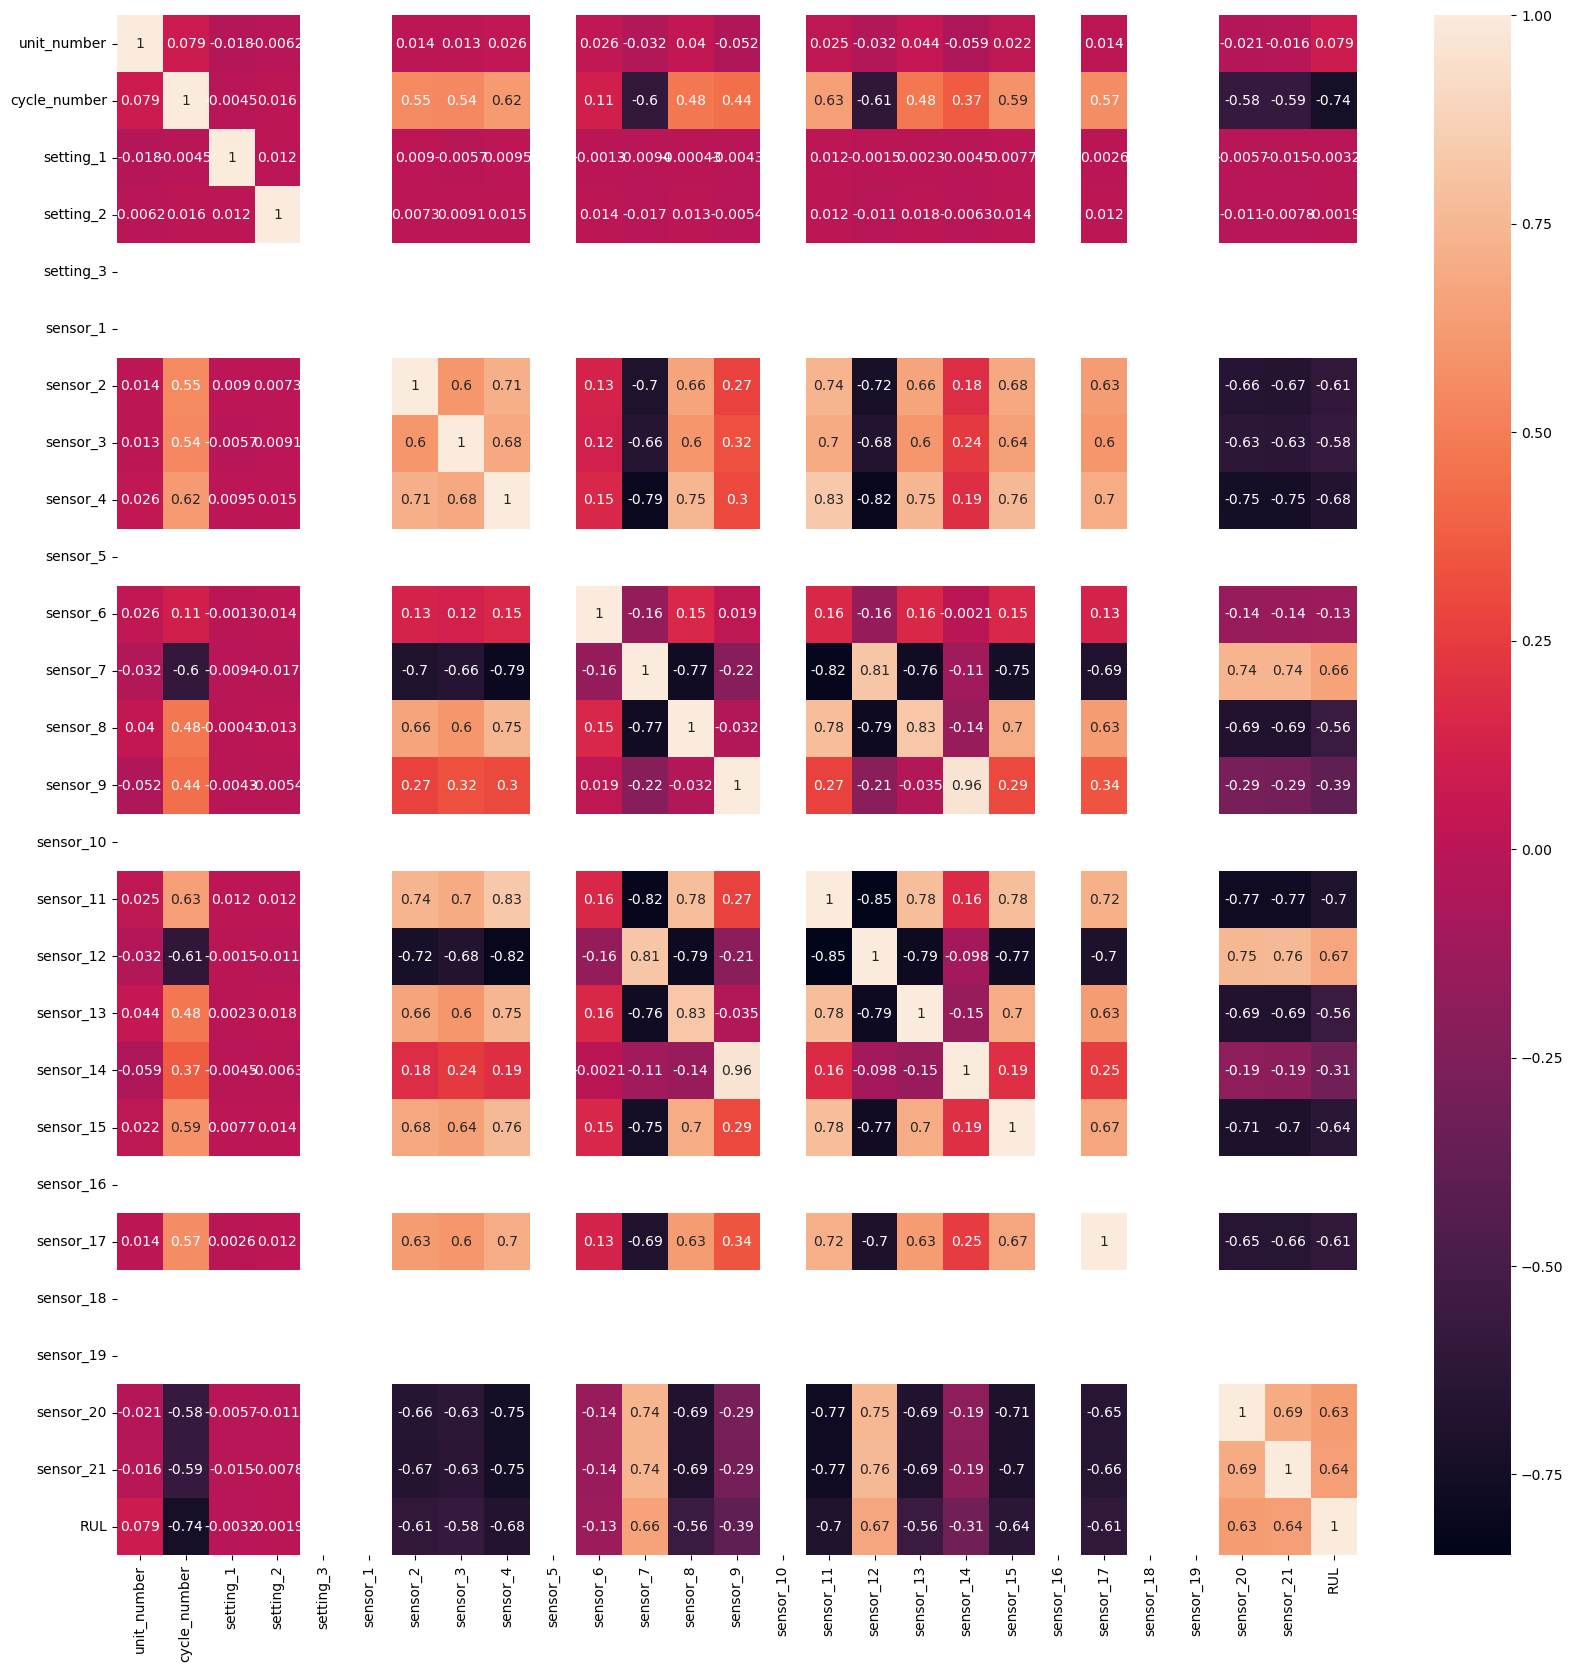

In [6]:
#3a
fig = plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()
#Based on this heat map, the variable RUL is most strongly positively correlated with sensor 7, sensor 12, sensor 20, and
#sensor 21. RUL has a strong negative correlation with cycle number, sensor 4, and sensor 15. 

In [7]:
#3b
#The variables in the heat map with NaN are setting 3, sensor 1, sensor 5, sensor 10, sensor 16, sensor 18, and sensor 19.
#A NaN correlation value means that there is no correlation between that variable and any other variables. This could happen
#because the value of the variable does not change as all of the other variables change. It is likely not a dependent value. 

In [8]:
#3c
df = df.drop(['setting_3','sensor_1','sensor_5','sensor_10','sensor_16','sensor_18','sensor_19'],axis=1)
#It is reasonable to drop these columns from the data set because the values do not change at any time throughout the data
#collection, so they do not add anything to the data set.

In [9]:
#4a
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

x = df.drop(['unit_number','cycle_number','RUL'],axis=1)
y = df["RUL"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Engine = LinearRegression()
Engine.fit(x_train, y_train)

LinearRegression()

In [10]:
ypred = Engine.predict(x_test)

In [11]:
from sklearn.metrics import r2_score

In [12]:
print(Engine.score(x_train, y_train))
r2_score(y_test, ypred)
#The score of this model on the training data is .5807787 and the score of this model on the test data is .5760879. I believe
#that I got these scores because the data is not strongly correlated, but shows some relationship.

0.5806858949016199


0.5759163385806394

Text(0, 0.5, 'Residuals')

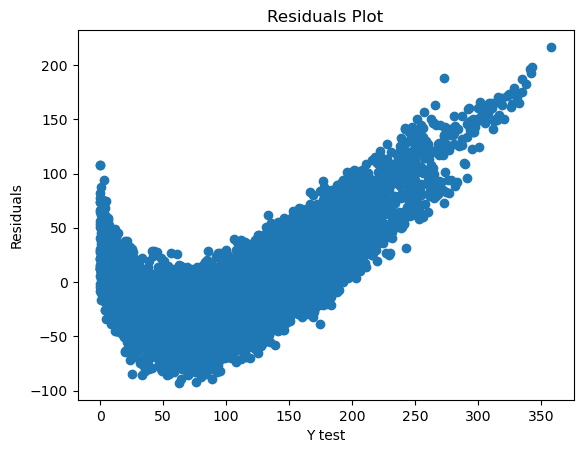

In [13]:
residuals = (y_test - ypred)
plt.scatter(y_test, residuals)
plt.title('Residuals Plot')
plt.xlabel('Y test')
plt.ylabel('Residuals')
#This residuals plot shows a peak at around 0 and then an upward trend from 0 to 350 on the x-axis and from -100 to 200
#on the y-axis. 

In [14]:
#4c
#This model is being used to predict the remaining useful life (RUL) of an engine under certain conditions. The RUL is defined
#by the remaining cycles until failure. This means that we are taking the features being observed, including cycle number,
#settings, and sensor data readings from 21 different sensors to predict how many cycles it will take for an engine to fail 
#based on the given features. 

In [15]:
#5a
from sklearn.feature_selection import RFE

rfe = RFE(estimator = LinearRegression() , n_features_to_select = 1)
fit = rfe.fit(x_train, y_train)

In [16]:
print(fit.n_features_)
print(fit.ranking_)

1
[17 16 11 12  4 15  5 14  2  1  3 13  6  7  9 10  8]


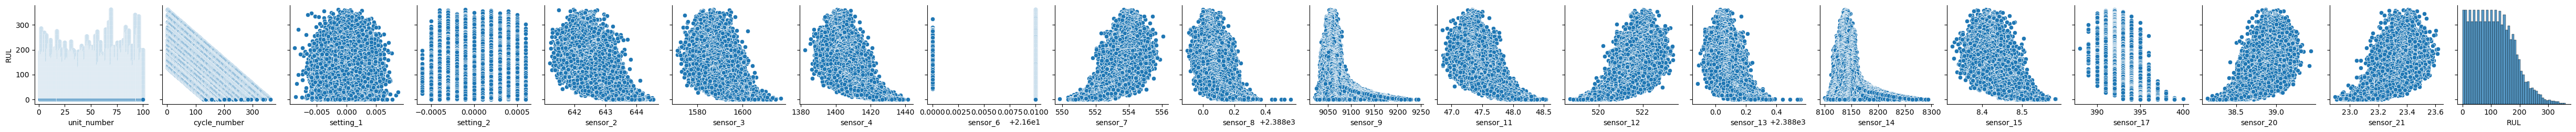

In [17]:
#5b
sns.pairplot(data=df, y_vars=['RUL']) 
#The 3 worst ranked features from the previous part are 9, 10, and 7. Based purely on observation, these features are the 
#worst ranked because they are all skewed in the negative direction. The features that are ranked the best are all skewed 
#towards the positive direction. 

In [18]:
#6
x = df.drop(['unit_number','cycle_number','RUL'],axis=1)
y = y.clip(upper=100) 

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Engine = LinearRegression()
Engine.fit(x_train, y_train)

LinearRegression()

In [20]:
ypred = Engine.predict(x_test)

In [21]:
print(Engine.score(x_train, y_train))
r2_score(y_test, ypred)
#The training and test scores increase here from .59 and .56 in the previous model to .76 and .75 in the new
#model. 

0.7578106029542458


0.7511344825056802

Text(0, 0.5, 'Residuals')

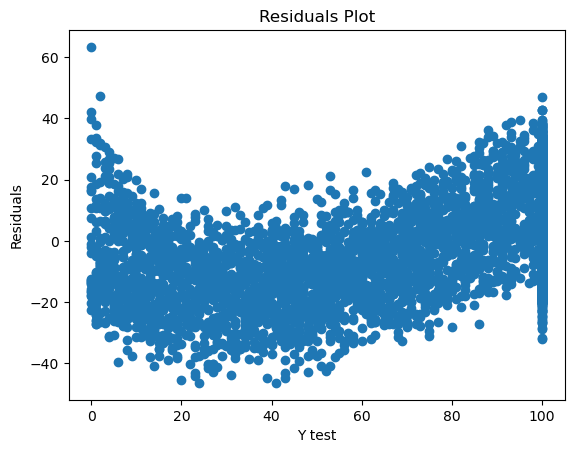

In [22]:
residuals = (y_test - ypred)
plt.scatter(y_test, residuals)
plt.title('Residuals Plot')
plt.xlabel('Y test')
plt.ylabel('Residuals')
#This residuals plot shows the values from 0 to 100 of the y test results. Around 100 in the previous plot is where the
#plot appears to become linear, so this second residual plot focuses on the non-linear part of th previous plot. 

In [23]:
#PART 2

In [108]:
#1
df = pd.read_csv('defects.csv')

In [102]:
#2
df["fault_type"].value_counts()
#The distribution of fault types is as follows: 385 due to bumps, 376 die to K scratch, 180 due to Z scratch, 152 due to
#pastry, 68 from stains, 51 from dirtiness, and 628 from other causes. 

Other_Faults    628
Bumps           385
K_Scatch        376
Z_Scratch       180
Pastry          152
Stains           68
Dirtiness        51
Name: fault_type, dtype: int64

In [103]:
#3a
x = df.drop(['Unnamed: 0','fault_type'],axis=1)
y = df["fault_type"]

In [104]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [91]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)

C:\Users\megan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [92]:
#3b
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)
#The confusion matrix shows the rates of misclassification among different features of the data set. The diagonal shows 
#the number of correct predictions. The most commonly misclassified features are other predictions, which was the predicteed
#outcome but actually was something else in 61 cases and Z_scratch, which was predicted as something else in 83 cases.

[[ 60   0   3  48   7   1   2]
 [  1  11   0   6   1   0   0]
 [  0   0 110   6   0   1   1]
 [ 19   3  11 121  16   1   8]
 [  4   0   0  14  17   0   1]
 [  0   0   0   3   0  17   0]
 [  2   1   0   6   1   0  49]]


In [93]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.697463768115942


In [98]:
#3c
model = LogisticRegression(max_iter = 200)

model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)

In [99]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[ 58   0   1  51   3   0   2]
 [  0   3   0   5   1   0   0]
 [  2   0 108   7   1   1   0]
 [ 33   4  12 115   9   2   5]
 [  5   3   1  16  23   0   1]
 [  1   0   0   2   0  22   0]
 [  0   0   0   4   0   0  51]]


In [100]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
#The accuracy of my model did not improve by using 200 iterations.

Accuracy:  0.6884057971014492


In [105]:
model = LogisticRegression(max_iter = 5000)

model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)

In [106]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[ 78   0   0  35   1   0   3]
 [  0   8   0   7   0   0   0]
 [  1   1 108   5   1   1   1]
 [ 40   4   6 111   9   3  11]
 [  6   1   0  14  23   0   3]
 [  0   0   0   1   0  12   0]
 [  2   0   1   5   0   0  50]]


In [107]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
#The accuracy of this model has increased by around 3%. This makes sense because the more data that is input, the more
#accurate the results will be over time. More data in the sample will bring the accuracy level close to the real accuracy.

Accuracy:  0.7065217391304348


In [109]:
#4
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [118]:
#4a
x = df.drop(['Unnamed: 0','fault_type'],axis=1)
y = df["fault_type"]

In [119]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

model = LogisticRegression()

model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)

C:\Users\megan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [120]:
#4b
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
#The accuracy is much worse than in part 3. This scaling made the data less accurate and classifies almost everything as 
#other faults.

[[  5   0   5  91   1   0   0]
 [  0   0   0  18   0   0   0]
 [  8   0   6  93   0   0   0]
 [ 15   0   8 172   1   0   0]
 [  1   0   1  40   1   0   0]
 [  4   0   0  23   0   0   0]
 [  2   0   1  54   1   0   1]]
Accuracy:  0.3351449275362319


In [121]:
#5
model2 = LogisticRegression(max_iter = 10000, penalty = "l2", C = 0.1)

model2.fit(x_train_scaled, y_train)

y_pred2 = model2.predict(x_test_scaled)

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred2))

Accuracy:  0.338768115942029


In [122]:
model2 = LogisticRegression(max_iter = 10000, penalty = "l2", C = 1)

model2.fit(x_train_scaled, y_train)

y_pred2 = model2.predict(x_test_scaled)

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred2))

Accuracy:  0.3351449275362319


In [123]:
model2 = LogisticRegression(max_iter = 10000, penalty = "l2", C = 10)

model2.fit(x_train_scaled, y_train)

y_pred2 = model2.predict(x_test_scaled)

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred2))

Accuracy:  0.3423913043478261


In [124]:
model2 = LogisticRegression(max_iter = 10000, penalty = "l2", C = 100)

model2.fit(x_train_scaled, y_train)

y_pred2 = model2.predict(x_test_scaled)

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred2))

Accuracy:  0.3423913043478261


In [125]:
model2 = LogisticRegression(max_iter = 10000, penalty = "l2", C = 1000)

model2.fit(x_train_scaled, y_train)

y_pred2 = model2.predict(x_test_scaled)

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred2))

Accuracy:  0.3442028985507246


In [126]:
model2 = LogisticRegression(max_iter = 10000, penalty = "l2", C = 10000)

model2.fit(x_train_scaled, y_train)

y_pred2 = model2.predict(x_test_scaled)

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred2))

Accuracy:  0.3423913043478261


In [ ]:
#The optimal value of C in this model is between 100 and 1000. As the value of C increases from .1 to 100, the accuracy
#of the model increases. It reaches a maximum at 100 which stays about the same until 1000. This tells
#me that it is important to avoid over regularization in this model. 